In [0]:
import pandas as pd

In [0]:
data=pd.read_csv("/dbfs/FileStore/shared_uploads/rsanku@saintpeters.edu/train.csv")

In [0]:
data.head(5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
data.shape

(7613, 5)

In [0]:
data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [0]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [0]:
data.location.value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
Some pum pum             1
Paulton, England         1
SEA Server               1
todaysbigstock.com       1
???????? ?????????.      1
Name: location, Length: 3341, dtype: int64

In [0]:

data=data.drop(columns='keyword')
data=data.drop(columns='location')

In [0]:
pip install wordcloud

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached wordcloud-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


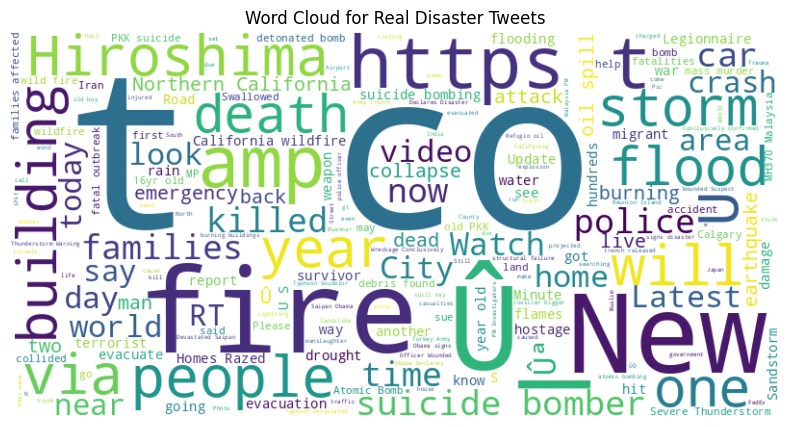

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


real_disaster_tweets = " ".join(data[data['target'] == 1]['text'])
not_real_disaster_tweets = " ".join(data[data['target'] == 0]['text'])


generate_word_cloud(real_disaster_tweets, "Word Cloud for Real Disaster Tweets")




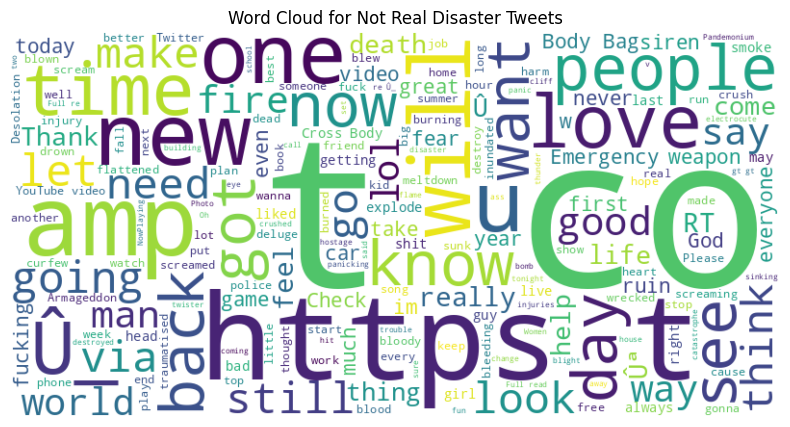

In [0]:

generate_word_cloud(not_real_disaster_tweets, "Word Cloud for Not Real Disaster Tweets")

In [0]:
X_train=data.text
Y_train=data.target
X_train[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [0]:

def get_wordnet_pos(pos_tag):
    
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [0]:

import nltk
nltk.download('stopwords')

/databricks/python/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
import numpy as np
def tokenize(sent, remove_stopwords=False,lemmatize=True,stop_words=stopwords.words('english')):
    
    tokens = sent.split()
    
    #lowercase
    tokens = [token.lower() if isinstance(token,str) else token for token in tokens]
    
    #Remove punctuations
    tokens = [token.strip(string.punctuation) for token in tokens]
    
    if remove_stopwords:
    #remove_stopwords:
        tokens = [token for token in tokens if not token in stop_words]
    
    if lemmatize:
        
        tagged_tokens= nltk.pos_tag(tokens)

        wordnet_lemmatizer = WordNetLemmatizer()
    
        lemmatized_words = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for (word, tag) in tagged_tokens]       
        tokens = lemmatized_words
    
    
    #This is an extra line we will use to concat all our tokens
    tokens = " ".join(tokens)
    
    return tokens

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
tokenize(X_train[0],remove_stopwords=True)

'deed reason earthquake may allah forgive u'

In [0]:

X_train=X_train.apply(lambda x : tokenize(x,remove_stopwords=True))
X_train

0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2       resident ask shelter place notify officer evac...
3       13,000 people receive wildfire evacuation orde...
4       get sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant crane hold bridge collapse nearby ho...
7609    aria_ahrary thetawniest control wild fire cali...
7610    m1.94 01:04 utc]?5km volcano hawaii http://t.c...
7611    police investigate e-bike collide car little p...
7612    late home raze northern california wildfire  a...
Name: text, Length: 7613, dtype: object

In [0]:
data_test=pd.read_csv("/dbfs/FileStore/shared_uploads/rsanku@saintpeters.edu/test.csv")

In [0]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [0]:
data_test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [0]:

data_test=data_test.drop(columns='keyword')
data_test=data_test.drop(columns='location')

In [0]:
data_test.head(5)

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [0]:
data_test_y=pd.read_csv("/dbfs/FileStore/shared_uploads/rsanku@saintpeters.edu/sample_submission.csv")

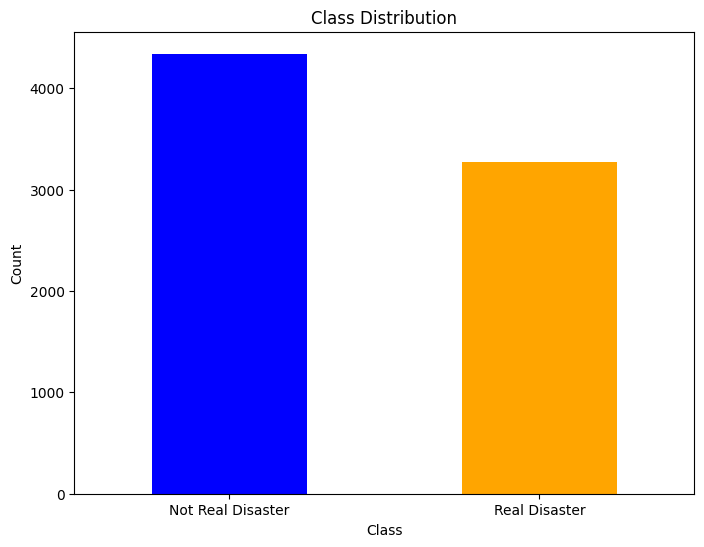

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = data['target'].value_counts()

# Plot the class distribution bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Real Disaster', 'Real Disaster'], rotation=0)
plt.show()


In [0]:
data_test_y.head(5)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [0]:
data_test_y.nunique()

id        3263
target       1
dtype: int64

In [0]:

X_test=data_test.text
Y_test=data_test_y.target
X_test[0]

'Just happened a terrible car crash'

In [0]:
tokenize(X_test[0],remove_stopwords=True)

'happen terrible car crash'

In [0]:
X_test=X_test.apply(lambda x : tokenize(x,remove_stopwords=True))
X_test

0                               happen terrible car crash
1       heard earthquake different city stay safe ever...
2       forest fire spot pond geese flee across street...
3                       apocalypse light spokane wildfire
4                   typhoon soudelor kill 28 china taiwan
                              ...                        
3258    earthquake safety los angeles ûò safety faste...
3259    storm ri bad last hurricane city&amp;3others h...
3260    green line derailment chicago http://t.co/utbx...
3261    meg issue hazardous weather outlook hwo http:/...
3262    cityofcalgary activate municipal emergency pla...
Name: text, Length: 3263, dtype: object

In [0]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7613,)
(3263,)
(7613,)
(3263,)


In [0]:
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
seed = 1
tfidf_vectorizer_object = TfidfVectorizer(max_df=1.0, 
                                          min_df=0.0, 
                                          stop_words='english')

X_train_tf_idf = tfidf_vectorizer_object.fit_transform(X_train)

X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:

#Let's use the fitted TF-IDF object on test data
X_test_tf_idf = tfidf_vectorizer_object.transform(X_test)
X_test_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB().fit(X_train_tf_idf, Y_train)
y_pred_nb = clf_nb.predict(X_test_tf_idf)
y_pred_nb

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_true=Y_test,y_pred=y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.67      3263
   macro avg       0.50      0.33      0.40      3263
weighted avg       1.00      0.67      0.80      3263



/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [0]:
clf_rf = RandomForestClassifier().fit(X_train_tf_idf, Y_train)
y_pred_rf = clf_rf.predict(X_test_tf_idf)
y_pred_rf

array([0, 1, 1, ..., 1, 1, 0])

In [0]:
print(y_pred_rf)

[1 1 1 ... 1 1 0]


In [0]:
import numpy as np

# Count the number of instances with class label 0 (no)
num_zeros = np.sum(y_pred_rf == 0)

# Count the number of instances with class label 1 (yes)
num_ones = np.sum(y_pred_rf == 1)

print("Number of instances predicted as 'no' (class 0):", num_zeros)
print("Number of instances predicted as 'yes' (class 1):", num_ones)

Number of instances predicted as 'no' (class 0): 2222
Number of instances predicted as 'yes' (class 1): 1041


In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_true=Y_test,y_pred=y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.68      3263
   macro avg       0.50      0.34      0.40      3263
weighted avg       1.00      0.68      0.81      3263



/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Multinomial Naive Bayes
conf_matrix_nb = confusion_matrix(Y_test, y_pred_nb)

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)

print("Confusion Matrix for Multinomial Naive Bayes:")
print(conf_matrix_nb)
print()

print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)
print()


Confusion Matrix for Multinomial Naive Bayes:
[[2184 1079]
 [   0    0]]

Confusion Matrix for Random Forest:
[[2206 1057]
 [   0    0]]



In [0]:
clf_svm = SVC().fit(X_train_tf_idf, Y_train)
y_pred_svm = clf_svm.predict(X_test_tf_idf)
y_pred_svm

array([1, 1, 1, ..., 1, 1, 0])

In [0]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Multinomial Naive Bayes
conf_matrix_svm = confusion_matrix(Y_test, y_pred_svm)



print("Confusion Matrix for Support Vector:")
print(conf_matrix_svm)

Confusion Matrix for Support Vector:
[[2155 1108]
 [   0    0]]


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

n_inputs = X_train_tf_idf.shape[1]  # Number of input features

model = Sequential()
model.add(Dense(256, input_dim=n_inputs, activation='relu'))  # First hidden layer with 256 neurons
model.add(Dense(64, activation='relu'))  # Second hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Third hidden layer with 32 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

optimizer = Adam(learning_rate=0.001)  # Define optimizer with learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer)  # Compile the model with binary crossentropy loss

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4989952   
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5008513 (19.11 MB)
Trainable params: 5008513 (19.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [0]:
X_train_tfidf_dense = X_train_tf_idf.toarray()
num_epochs = 20

callback = model.fit(X_train_tfidf_dense,
                     Y_train,
                     verbose = 1,
                     batch_size=32,
                     epochs = num_epochs,
                     workers=-1)

Epoch 1/20
238/238 [==============================] - 5s 17ms/step - loss: 0.5122
Epoch 2/20
238/238 [==============================] - 4s 17ms/step - loss: 0.1955
Epoch 3/20
158/238 [==================>...........] - ETA: 1s - loss

*** WARNING: max output size exceeded, skipping output. ***

238/238 [==============================] - 4s 18ms/step - loss: 0.0065
Epoch 19/20
238/238 [==============================] - 4s 18ms/step - loss: 0.0066
Epoch 20/20
238/238 [==============================] - 4s 17ms/step - loss: 0.0068


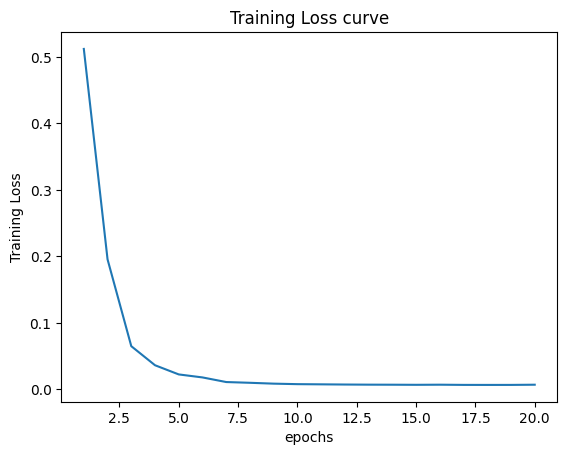

In [0]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,num_epochs+1)),callback.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss curve')
plt.show()

In [0]:
y_pred_train = model.predict(X_train_tf_idf)
y_pred_test = model.predict(X_test_tf_idf)

102/102 [==============================] - 0s 1ms/step


In [0]:
y_pred_test = [0 if val < 0.5 else 1 for val in y_pred_test ]

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_true=Y_test, y_pred=y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.60      3263
   macro avg       0.50      0.30      0.37      3263
weighted avg       1.00      0.60      0.75      3263



/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
accuracy = accuracy_score(Y_test, y_pred_test)
conf_matrix = confusion_matrix(Y_test, y_pred_test)

print("Accuracy of NN :", accuracy)
print("Confusion Matrix for NN classifier:")
print(conf_matrix)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2807340269452047>:1
----> 1 accuracy = accuracy_score(Y_test, y_pred_test)
      2 conf_matrix = confusion_matrix(Y_test, y_pred_test)
      4 print("Accuracy of NN :", accuracy)

NameError: name 'accuracy_score' is not defined

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define and train the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train_tf_idf, Y_train)

# Make predictions on the test data
y_pred_gb = clf_gb.predict(X_test_tf_idf)

# Evaluate the model
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)

print("Accuracy of Gradient Boosting classifier:", accuracy_gb)
print("Confusion Matrix for Gradient Boosting classifier:")
print(conf_matrix_gb)

Accuracy of Gradient Boosting classifier: 0.7453263867606497
Confusion Matrix for Gradient Boosting classifier:
[[2432  831]
 [   0    0]]


##Hyper-Parameters##


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(clf_gb, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_tf_idf, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_tf_idf, Y_test)
print("Accuracy:", accuracy)


Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Accuracy: 0.6656451118602513


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define and train the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2,
                                    max_depth=4, random_state=0)
clf_gb.fit(X_train_tf_idf, Y_train)

# Make predictions on the test data
y_pred_gb = clf_gb.predict(X_test_tf_idf)

# Evaluate the model
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)

print("Accuracy of Gradient Boosting classifier:", accuracy_gb)
print("Confusion Matrix for Gradient Boosting classifier:")
print(conf_matrix_gb)

Accuracy of Gradient Boosting classifier: 0.6693227091633466
Confusion Matrix for Gradient Boosting classifier:
[[2184 1079]
 [   0    0]]


In [0]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

True

##data Preprocessing Hyper-parameters##
**Implementating word tokenizer instead of split**


In [0]:
def tokenize_hp(corpus, remove_stopwords=True,lemmatize=True,stop_words=stopwords.words('english')):
    
    tokenized_corpus = []
    
    for sent in corpus:
    
        #Notice, we're now using NLTK's word tokenizer, instead of simply splitting the sentence
        tokens = nltk.word_tokenize(sent)

        #lowercase
        tokens = [token.lower() if isinstance(token,str) else token for token in tokens]

        #Remove punctuations
        tokens = [token.strip(string.punctuation) for token in tokens]

        if remove_stopwords:
        #remove_stopwords:
            tokens = [token for token in tokens if not token in stop_words]

        if lemmatize:

            tagged_tokens= nltk.pos_tag(tokens)

            wordnet_lemmatizer = WordNetLemmatizer()

            lemmatized_words = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for (word, tag) in tagged_tokens]       
            tokens = lemmatized_words


        #This is an extra line we will use to concat all our tokens
        tokens = " ".join(tokens)
        
        tokenized_corpus.append(tokens)
    
    return tokenized_corpus

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
X_train_hp=tokenize_hp(X_train)
X_train_hp

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident ask shelter place notify officer evacuation shelter place order expect',
 '13,000 people receive wildfire evacuation order california',
 'get sent photo ruby alaska smoke wildfires pour school',
 'rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flood street manitou colorado spring area',
 'top hill see fire wood',
 'emergency evacuation happen building across street',
 'afraid tornado come area',
 'three people die heat wave far',
 'haha south tampa get flood hah wait second live south tampa gon na gon na fvck flooding',
 'rain flood florida tampabay tampa 18 19 day lose count',
 'flood bago myanmar arrive bago',
 'damage school bus 80 multi car crash breaking',
 'man',
 'love fruit',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'ridiculous',
 'london cool',
 'love skiing',
 'wonderful day',
 'loooo

In [0]:
X_test_hp=tokenize_hp(X_test)
X_test_hp

['happen terrible car crash',
 'heard earthquake different city stay safe everyone',
 'forest fire spot pond geese flee across street save',
 'apocalypse light spokane wildfire',
 'typhoon soudelor kill 28 china taiwan',
 'shake  earthquake',
 'probably still show life arsenal yesterday eh eh',
 'hey',
 'nice hat',
 'fuck',
 'like cold',
 'nooooooooo',
 'tell',
 '',
 'awesome',
 'birmingham wholesale market ablaze bbc news fire break birmingham wholesale market http  t.co/irwqcezweu',
 'sunkxssedharry wear short race ablaze',
 'previouslyondoyintv toke makinwa\x89ûªs marriage crisis set nigerian twitter ablaze http  t.co/cmghxba2xi',
 'check http  t.co/roi2nsmejj http  t.co/3tj8zjin21 http  t.co/yduixefipe http  t.co/lxtjc87kls nsfw',
 'psa i\x89ûªm split personality techie follow ablaze_co burner follow ablaze',
 'beware world ablaze sierra leone amp guap',
 'burn man ablaze turban diva http  t.co/hodwosamws via etsy',
 'dis song people take 1 thing run smh eye opener though 2 set gam

In [0]:
tfidf_vectorizer_object = TfidfVectorizer(max_df=1.0, 
                                          min_df=0.0, 
                                          stop_words='english')

X_train_tf_idf_hp = tfidf_vectorizer_object.fit_transform(X_train_hp)

X_train_tf_idf_hp.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
#Let's use the fitted TF-IDF object on test data
X_test_tf_idf_hp = tfidf_vectorizer_object.transform(X_test_hp)
X_test_tf_idf_hp.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define and train the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train_tf_idf_hp, Y_train)

# Make predictions on the test data
y_pred_gb = clf_gb.predict(X_test_tf_idf_hp)

# Evaluate the model
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)

print("Accuracy of Gradient Boosting classifier:", accuracy_gb)
print("Confusion Matrix for Gradient Boosting classifier:")
print(conf_matrix_gb)

Accuracy of Gradient Boosting classifier: 0.7606497088568802
Confusion Matrix for Gradient Boosting classifier:
[[2482  781]
 [   0    0]]


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define and train the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier(
                                    loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', 
                                    min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, 
                                    max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
clf_gb.fit(X_train_tf_idf_hp, Y_train)

# Make predictions on the test data
y_pred_gb = clf_gb.predict(X_test_tf_idf_hp)

# Evaluate the model
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)

print("Accuracy of Gradient Boosting classifier:", accuracy_gb)
print("Confusion Matrix for Gradient Boosting classifier:")
print(conf_matrix_gb)

Accuracy of Gradient Boosting classifier: 0.7597303095311063
Confusion Matrix for Gradient Boosting classifier:
[[2479  784]
 [   0    0]]


##Hyper-Parameter 2##


In [0]:
from bs4 import BeautifulSoup

def tokenize_improved(sent, remove_stopwords=False,lemmatize=True,stop_words=stopwords.words('english'), strip_html=True):
    
    #This line will strip all html
    if strip_html:
        sent = BeautifulSoup(sent, 'html.parser').get_text()
    
    #Notice, we're now using NLTK's word tokenizer, instead of simply splitting the sentence
    tokens = nltk.word_tokenize(sent)
    
    #lowercase
    tokens = [token.lower() if isinstance(token,str) else token for token in tokens]
    
    #Remove punctuations
    tokens = [token.strip(string.punctuation) for token in tokens]
    
    if remove_stopwords:
    #remove_stopwords:
        tokens = [token for token in tokens if not token in stop_words]
    
    if lemmatize:
        
        tagged_tokens= nltk.pos_tag(tokens)

        wordnet_lemmatizer = WordNetLemmatizer()
    
        lemmatized_words = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for (word, tag) in tagged_tokens]       
        tokens = lemmatized_words
    
    
    #This is an extra line we will use to concat all our tokens
    tokens = " ".join(tokens)
    
    return tokens

In [0]:
X_tokenized = X_train.apply(lambda x : tokenize_improved(x,remove_stopwords=True, strip_html=True))
X_tokenized

/databricks/python/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2       resident ask shelter place notify officer evac...
3       13,000 people receive wildfire evacuation orde...
4       get sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant crane hold bridge collapse nearby ho...
7609    aria_ahrary thetawniest control wild fire cali...
7610    m1.94 01:04 utc   5km volcano hawaii http  t.c...
7611    police investigate e-bike collide car little p...
7612    late home raze northern california wildfire ab...
Name: text, Length: 7613, dtype: object

In [0]:
X_test_tokenized = X_test.apply(lambda x : tokenize_improved(x,remove_stopwords=True, strip_html=True))

In [0]:
tfidf_vectorizer_object = TfidfVectorizer(max_df=1.0, 
                                          min_df=0.0, 
                                          stop_words='english')

X_train_tf_idf_hp_2 = tfidf_vectorizer_object.fit_transform(X_tokenized)

X_train_tf_idf_hp_2.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
#Let's use the fitted TF-IDF object on test data
X_test_tf_idf_hp_2 = tfidf_vectorizer_object.transform(X_test_tokenized)
X_test_tf_idf_hp_2.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define and train the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train_tf_idf_hp_2, Y_train)

# Make predictions on the test data
y_pred_gb = clf_gb.predict(X_test_tf_idf_hp_2)

# Evaluate the model
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)

print("Accuracy of Gradient Boosting classifier:", accuracy_gb)
print("Confusion Matrix for Gradient Boosting classifier:")
print(conf_matrix_gb)

Accuracy of Gradient Boosting classifier: 0.7585044437634079
Confusion Matrix for Gradient Boosting classifier:
[[2475  788]
 [   0    0]]


## WORD2VEC Embeddings##


In [0]:
from bs4 import BeautifulSoup

def tokenize_hp_3(sent, remove_stopwords=False,lemmatize=True,stop_words=stopwords.words('english'), strip_html=True):
    
    #This line will strip all html
    if strip_html:
        sent = BeautifulSoup(sent, 'html.parser').get_text()
    
    #Notice, we're now using NLTK's word tokenizer, instead of simply splitting the sentence
    tokens = nltk.word_tokenize(sent)
    
    #lowercase
    tokens = [token.lower() if isinstance(token,str) else token for token in tokens]
    
    #Remove punctuations
    tokens = [token.strip(string.punctuation) for token in tokens]
    
    if remove_stopwords:
    #remove_stopwords:
        tokens = [token for token in tokens if not token in stop_words]
    
    if lemmatize:
        
        tagged_tokens= nltk.pos_tag(tokens)

        wordnet_lemmatizer = WordNetLemmatizer()
    
        lemmatized_words = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for (word, tag) in tagged_tokens]       
        tokens = lemmatized_words
    
    
    #This is an extra line we will use to concat all our tokens
    tokens = " ".join(tokens)

    
    return tokens

In [0]:
X_tokenized_hp_3 = X_train.apply(lambda x : tokenize_hp_3(x,remove_stopwords=True, strip_html=True))
X_tokenized_hp_3

/databricks/python/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2       resident ask shelter place notify officer evac...
3       13,000 people receive wildfire evacuation orde...
4       get sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant crane hold bridge collapse nearby ho...
7609    aria_ahrary thetawniest control wild fire cali...
7610    m1.94 01:04 utc   5km volcano hawaii http  t.c...
7611    police investigate e-bike collide car little p...
7612    late home raze northern california wildfire ab...
Name: text, Length: 7613, dtype: object

In [0]:
X_test_tokenized_hp_3 = X_test.apply(lambda x : tokenize_hp_3(x,remove_stopwords=True, strip_html=True))

In [0]:
pip install gensim

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Not uninstalling numpy at /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-f16dd22f-bbd9-46c6-9e5a-a67ac6fa1834
    Can't uninstall 'numpy'. No files were found to uninstall.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from gensim.models import Word2Vec
import numpy as np


word2vec_model = Word2Vec(sentences=X_tokenized_hp_3, vector_size=100, window=5, min_count=1, workers=4)


def tokens_to_embeddings(tokens):
    embeddings = []
    for token in tokens.split():
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    if embeddings:
        return np.mean(embeddings, axis=0) 
    else:
        return np.zeros(word2vec_model.vector_size)  

# Convert tokenized corpus to Word2Vec embeddings
X_train_word2vec = np.array([tokens_to_embeddings(tokens) for tokens in X_tokenized_hp_3])

# Define and train the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train_word2vec, Y_train)



# Convert tokenized test corpus to Word2Vec embeddings
X_test_word2vec = np.array([tokens_to_embeddings(tokens) for tokens in X_test_tokenized_hp_3])

# Make predictions on the test data
y_pred_gb = clf_gb.predict(X_test_word2vec)

# Evaluate the model
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)

print("Accuracy of Gradient Boosting classifier:", accuracy_gb)
print("Confusion Matrix for Gradient Boosting classifier:")
print(conf_matrix_gb)


Accuracy of Gradient Boosting classifier: 0.9760956175298805
Confusion Matrix for Gradient Boosting classifier:
[[3185   78]
 [   0    0]]


In [0]:
data_collect=pd.read_csv("/dbfs/FileStore/shared_uploads/rsanku@saintpeters.edu/final_mixed_train_data.csv")

In [0]:
data_collect.head(5)

,id,text,target
0,13533,@Drsarwatzaib070 come on. IK will face MCourt ...,0
1,10926,@KatieKatCubs you already know how this shit g...,1
2,14503,Truth...\nhttps://t.co/k44tL3rfMy\n#News\n#BBC...,0
3,3022,http://t.co/lMA39ZRWoY There is a way which se...,1
4,6302,@susanj357 @msnbc @allinwithchris it's like wa...,0


In [0]:
data_collect=data_collect.drop(columns='keyword')
data_collect=data_collect.drop(columns='location')
data_collect

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File <command-1381504001490862>:1
----> 1 data_collect=data_collect.drop(columns='keyword')
      2 data_collect=data_collect.drop(columns='location')
      3 data_collect

File /databricks/python/lib/python3.10/site-packages/pandas/util/_decorators.py:311, in deprecate_nonkeyword_arguments.<locals>.decorate.<locals>.wrapper(*args, **kwargs)
    305 if len(args) > num_allow_args:
    306     warnings.warn(
    307         msg.format(arguments=arguments),
    308         FutureWarning,
    309         stacklevel=stacklevel,
    310     )
--> 311 return func(*args, **kwargs)

File /databricks/python/lib/python3.10/site-packages/pandas/core/frame.py:4957, in DataFrame.drop(self, labels, axis, index, columns, level, inplace, errors)
   4809 @deprecate_nonkeyword_arguments(version=None, allowed_args=["self", "labels"])
   4810 def drop(
   4

In [0]:
data_collect.value_counts

<bound method DataFrame.value_counts of           id                                               text  target
0      13533  @Drsarwatzaib070 come on. IK will face MCourt ...       0
1      10926  @KatieKatCubs you already know how this shit g...       1
2      14503  Truth...\nhttps://t.co/k44tL3rfMy\n#News\n#BBC...       0
3       3022  http://t.co/lMA39ZRWoY There is a way which se...       1
4       6302  @susanj357 @msnbc @allinwithchris it's like wa...       0
...      ...                                                ...     ...
14995  11381  9 Mile backup on I-77 South...accident blockin...       0
14996   4697  Lucas Duda is Ghost Rider. Not the Nic Cage ve...       1
14997  11159  HEALTH FACT: 75% of muscle mass is made up of ...       1
14998   4154  We all carry these things inside that no one e...       0
14999  11499  Aftershock back to school kick off was great. ...       1

[15000 rows x 3 columns]>

In [0]:
X_train_new=data_collect.text
Y_train_new=data_collect.target
X_train_new[0]

'@Drsarwatzaib070 come on. IK will face MCourt for attacking parliment and hijacking TV station.'

In [0]:
from bs4 import BeautifulSoup

def tokenize_new(sent, remove_stopwords=False,lemmatize=True,stop_words=stopwords.words('english'), strip_html=True):
    
    #This line will strip all html
    if strip_html:
        sent = BeautifulSoup(sent, 'html.parser').get_text()
    
    #Notice, we're now using NLTK's word tokenizer, instead of simply splitting the sentence
    tokens = nltk.word_tokenize(sent)
    
    #lowercase
    tokens = [token.lower() if isinstance(token,str) else token for token in tokens]
    
    #Remove punctuations
    tokens = [token.strip(string.punctuation) for token in tokens]
    
    if remove_stopwords:
    #remove_stopwords:
        tokens = [token for token in tokens if not token in stop_words]
    
    if lemmatize:
        
        tagged_tokens= nltk.pos_tag(tokens)

        wordnet_lemmatizer = WordNetLemmatizer()
    
        lemmatized_words = [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for (word, tag) in tagged_tokens]       
        tokens = lemmatized_words
    
    
    #This is an extra line we will use to concat all our tokens
    tokens = " ".join(tokens)

    
    return tokens

In [0]:
X_tokenized_new = X_train_new.apply(lambda x : tokenize_new(x,remove_stopwords=True, strip_html=True))
X_tokenized_new

/databricks/python/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/databricks/python/lib/pytho

0         drsarwatzaib070 come  ik face mcourt attack p...
1         katiekatcubs already know shit go  world seri...
2        truth  https  t.co/k44tl3rfmy  news  bbc  cnn ...
3        http  t.co/lma39zrwoy way seemeth right unto m...
4         susanj357  msnbc  allinwithchris like watch h...
                               ...                        
14995    9 mile backup i-77 south  accident block right...
14996    lucas duda ghost rider  nic cage version actua...
14997    health fact  75  muscle mass make fluid  drink...
14998    carry thing inside one else see  hold u like a...
14999    aftershock back school kick great  want thank ...
Name: text, Length: 15000, dtype: object

In [0]:
data_test_new=pd.read_csv("/dbfs/FileStore/shared_uploads/rsanku@saintpeters.edu/new_test_data.csv")

In [0]:
data_test_target= pd.read_csv("/dbfs/FileStore/shared_uploads/rsanku@saintpeters.edu/new_sample_submission.csv")

In [0]:
data_test_new.head(5)

,id,keyword,location,text
0,10876,deluged,"Karachi, Pakistan",#Glimpses: Hyderabad deluged by heavy rainfall...
1,10877,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
2,10878,suicide%20bombing,Lagos,Imagine a school where suicide bombing Is bein...
3,10879,armageddon,"California, United States",#PBBan (Temporary:300) hyider_ghost2 @'aRmaged...
4,10880,mudslide,"Memphis, TN",Oso Washington Mudslide Response Interview ÛÒ...


In [0]:
data_test_target

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [0]:
data_test_new=data_test_new.drop(columns='keyword')
data_test_new=data_test_new.drop(columns='location')
data_test_new

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File <command-1381504001490991>:1
----> 1 data_test_new=data_test_new.drop(columns='keyword')
      2 data_test_new=data_test_new.drop(columns='location')
      3 data_test_new

File /databricks/python/lib/python3.10/site-packages/pandas/util/_decorators.py:311, in deprecate_nonkeyword_arguments.<locals>.decorate.<locals>.wrapper(*args, **kwargs)
    305 if len(args) > num_allow_args:
    306     warnings.warn(
    307         msg.format(arguments=arguments),
    308         FutureWarning,
    309         stacklevel=stacklevel,
    310     )
--> 311 return func(*args, **kwargs)

File /databricks/python/lib/python3.10/site-packages/pandas/core/frame.py:4957, in DataFrame.drop(self, labels, axis, index, columns, level, inplace, errors)
   4809 @deprecate_nonkeyword_arguments(version=None, allowed_args=["self", "labels"])
   4810 def drop(

In [0]:
data_test_new

,id,text
0,10876,#Glimpses: Hyderabad deluged by heavy rainfall...
1,10877,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
2,10878,Imagine a school where suicide bombing Is bein...
3,10879,#PBBan (Temporary:300) hyider_ghost2 @'aRmaged...
4,10880,Oso Washington Mudslide Response Interview ÛÒ...
...,...,...
3258,14134,VIDEO: 'We're picking up bodies from water': R...
3259,14135,@marcoarment Middle of winter in Sydney we hav...
3260,14136,Feel like I've got no control of anything that...
3261,14137,Another Mechanical Mod Explosion: Man Injured ...


In [0]:
X_test_new=data_test_new.text
Y_test_new=data_test_target.target

In [0]:
Y_test_new.nunique

<bound method IndexOpsMixin.nunique of 0       1
1       1
2       1
3       1
4       1
       ..
3258    1
3259    1
3260    1
3261    1
3262    1
Name: target, Length: 3263, dtype: int64>

In [0]:
X_test_tokenized_new = X_test_new.apply(lambda x : tokenize_new(x,remove_stopwords=True, strip_html=True))
X_test_tokenized_new 

/databricks/python/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


0        glimpse  hyderabad deluge heavy rainfall  htt...
1       barbados  bridgetown jamaica ûò two car set a...
2       imagine school suicide bomb taught teacher wou...
3        pbban  temporary:300  hyider_ghost2  armagedd...
4       oso washington mudslide response interview ûò...
                              ...                        
3258    video  pick body water   rescuer search hundre...
3259     marcoarment middle winter sydney snow bush fi...
3260    feel like get control anything go life minute ...
3261    another mechanical mod explosion  man injure p...
3262    sb57  new  deepwater horizon oil spill distrib...
Name: text, Length: 3263, dtype: object

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from gensim.models import Word2Vec
import numpy as np


word2vec_model = Word2Vec(sentences=X_tokenized_new, vector_size=100, window=5, min_count=1, workers=4)


def tokens_to_embeddings(tokens):
    embeddings = []
    for token in tokens.split():
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    if embeddings:
        return np.mean(embeddings, axis=0) 
    else:
        return np.zeros(word2vec_model.vector_size)  

# Convert tokenized corpus to Word2Vec embeddings
X_train_word2vec = np.array([tokens_to_embeddings(tokens) for tokens in X_tokenized_new])

# Define and train the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train_word2vec, Y_train_new)



# Convert tokenized test corpus to Word2Vec embeddings
X_test_word2vec = np.array([tokens_to_embeddings(tokens) for tokens in X_test_tokenized_hp_3])

# Make predictions on the test data
y_pred_gb = clf_gb.predict(X_test_word2vec)

# Evaluate the model
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)

print("Accuracy of Gradient Boosting classifier:", accuracy_gb)
print("Confusion Matrix for Gradient Boosting classifier:")
print(conf_matrix_gb)


Accuracy of Gradient Boosting classifier: 0.9653692920625192
Confusion Matrix for Gradient Boosting classifier:
[[3150  113]
 [   0    0]]


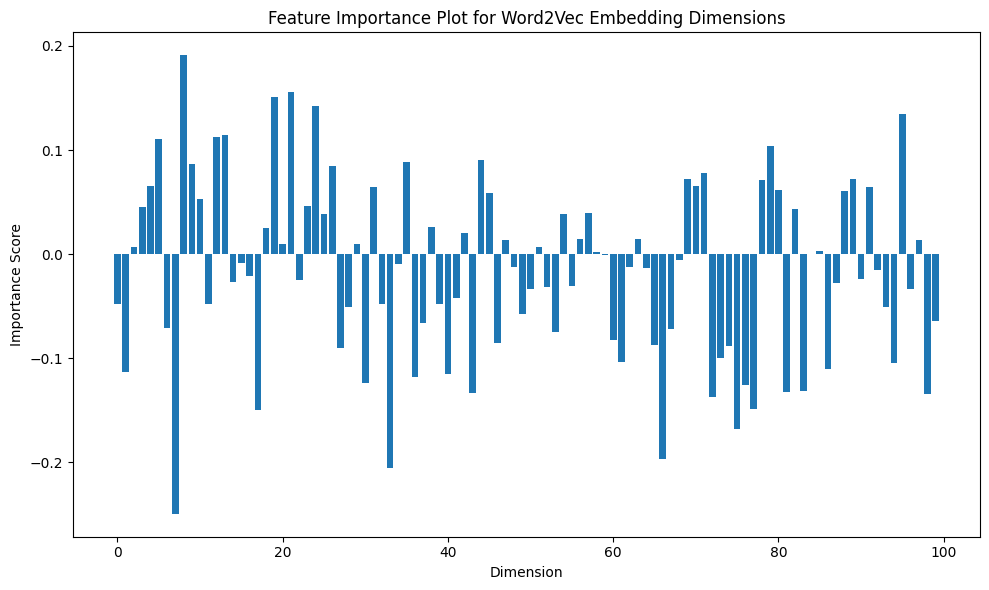

In [0]:
import matplotlib.pyplot as plt

# Assuming you have a trained Word2Vec model called word2vec_model
# Extracting feature importances for each dimension of the Word2Vec embeddings
feature_importances_word2vec = word2vec_model.wv.vectors.mean(axis=0)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_word2vec)), feature_importances_word2vec, align='center')
plt.xlabel('Dimension')
plt.ylabel('Importance Score')
plt.title('Feature Importance Plot for Word2Vec Embedding Dimensions')
plt.tight_layout()
plt.show()


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2565375733650734>:9
      7 disaster_importances = []
      8 for word in disaster_words:
----> 9     if word in feature_names:
     10         index = feature_names.index(word)
     11         disaster_importances.append(feature_importances[index])

NameError: name 'feature_names' is not defined